### Import libraries

In [79]:
#Import the required Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import solar output dataset

In [80]:
data = pd.read_csv('./PV_Output_Hannover_MA.csv')

In [81]:
#Reading the solar output data measure as %baseline
data

,Timestamp,% Baseline,City,County,State
0,"Jan 1, 2014 7am",0.0079,Hanover,Plymouth,Massachusetts
1,"Jan 1, 2014 8am",0.1019,Hanover,Plymouth,Massachusetts
2,"Jan 1, 2014 9am",0.3932,Hanover,Plymouth,Massachusetts
3,"Jan 1, 2014 10am",0.5447,Hanover,Plymouth,Massachusetts
4,"Jan 1, 2014 11am",0.5485,Hanover,Plymouth,Massachusetts
...,...,...,...,...,...
20566,"Mar 5, 2018 1pm",0.2325,Hanover,Plymouth,Massachusetts
20567,"Mar 5, 2018 2pm",0.2214,Hanover,Plymouth,Massachusetts
20568,"Mar 5, 2018 3pm",0.3111,Hanover,Plymouth,Massachusetts
20569,"Mar 5, 2018 4pm",0.0810,Hanover,Plymouth,Massachusetts


In [82]:
del data['City']
del data['County']
del data['State']

In [85]:
data

,Timestamp,% Baseline
0,"Jan 1, 2014 7am",0.0079
1,"Jan 1, 2014 8am",0.1019
2,"Jan 1, 2014 9am",0.3932
3,"Jan 1, 2014 10am",0.5447
4,"Jan 1, 2014 11am",0.5485
...,...,...
20566,"Mar 5, 2018 1pm",0.2325
20567,"Mar 5, 2018 2pm",0.2214
20568,"Mar 5, 2018 3pm",0.3111
20569,"Mar 5, 2018 4pm",0.0810


In [86]:
#Change Timestamp column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

### Making an API call to www.worldweatheronline.com to retrieve weather data for Hanover, Massachusetts location between 2014 and 2018

In [87]:
#Retrieving weather data from www.worldweatheronline.com into pandas dataframe and csv.
# from wwo_hist import retrieve_hist_data
# import os
# #writing csv file to the output folder
# os.chdir("./output")
# frequency = 1
# start_date = '01-JAN-2014'
# end_date = '03-05-2018'
# api_key = 'YOUR_API_KEY'
# location_list = ['02340']
# hist_weather_data = retrieve_hist_data(api_key,
#                                 location_list,
#                                 start_date,
#                                 end_date,
#                                 frequency,
#                                 location_label = False,
#                                 export_csv = True,
#                                 store_df = True)

In [8]:
weather_df = pd.read_csv('./output/02340.csv')

In [88]:
weather_df.head(5)

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,tempC,visibility,winddirDegree,windspeedKmph
0,2014-01-01 00:00:00,-3,-6,0.0,8.7,2,1,-12,-11,-5,-11,28,3,58,0.0,-4,10,273,20
1,2014-01-01 01:00:00,-3,-6,0.0,8.7,2,1,-12,-12,-5,-12,31,4,58,0.0,-5,10,274,22
2,2014-01-01 02:00:00,-3,-6,0.0,8.7,2,1,-12,-12,-5,-12,34,5,58,0.0,-5,10,276,25
3,2014-01-01 03:00:00,-3,-6,0.0,8.7,2,1,-12,-13,-5,-13,36,6,58,0.0,-5,10,278,27
4,2014-01-01 04:00:00,-3,-6,0.0,8.7,2,1,-13,-13,-6,-13,32,9,57,0.0,-6,10,271,23


In [10]:
#Change date_time column to datetime
weather_df['date_time'] = pd.to_datetime(weather_df['date_time'])
#Deleting some of the columns
del weather_df['location']
del weather_df['moonrise']
del weather_df['moonset']
del weather_df['sunrise']
del weather_df['sunset']
del weather_df['pressure']

In [11]:
#Merging weather data with the original solar output data
outcome = pd.merge(data, weather_df, how='left', left_on='Timestamp', right_on='date_time')

In [12]:
del outcome['date_time']

In [89]:
outcome.head(3)

,Timestamp,% Baseline,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,tempC,visibility,winddirDegree,windspeedKmph
0,2014-01-01 07:00:00,0.0079,-3,-6,0.0,8.7,2,1,-14,-13,-5,-13,24,13,52,0.0,-5,10,262,18
1,2014-01-01 08:00:00,0.1019,-3,-6,0.0,8.7,2,1,-14,-12,-5,-12,26,11,49,0.0,-5,10,266,20
2,2014-01-01 09:00:00,0.3932,-3,-6,0.0,8.7,2,1,-14,-11,-4,-11,27,9,46,0.0,-4,10,270,22


### Reading Solar Irradiance datasets from https://nsrdb.nrel.gov/ for 2014, 2015, 2016, 2017 and 2018

In [14]:
# Reading Solar irradiance data for the year 2014 from National Solar Radiation Database
df1= pd.read_csv('./Weather_data_2014.csv')

In [90]:
#df1

In [16]:
# Reading Solar irradiance data for the year 2015 from National Solar Radiation Database
df2= pd.read_csv('./Weather_data_2015.csv')

In [91]:
#df2

In [18]:
# Reading Solar irradiance data for the year 2016 from National Solar Radiation Database
df3= pd.read_csv('./Weather_data_2016.csv')

In [92]:
#df3

In [20]:
# Reading Solar irradiance data for the year 2017 from National Solar Radiation Database
df4= pd.read_csv('./Weather_data_2017.csv')

In [93]:
#df4

In [22]:
# Reading Solar irradiance data for the year 2018 from National Solar Radiation Database
df5= pd.read_csv('./Weather_data_2018.csv')

In [94]:
#df5

In [24]:
#Stacking all the Solar irradiance data into one dataframe 
result = pd.concat([df1,df2, df3, df4, df5], ignore_index=True)

In [95]:
result.head(5)

,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure,date_time
0,0,0,0,0,0,0,1,-6.0,124.02,0,0.12,3.5,78.43,-3.0,1010,2014-01-01 00:00:00
1,0,0,0,0,0,0,1,-5.0,135.09,0,0.12,3.8,81.74,-3.0,1010,2014-01-01 01:00:00
2,0,0,0,0,0,0,1,-5.0,145.77,0,0.12,4.2,81.25,-3.0,1010,2014-01-01 02:00:00
3,0,0,0,0,0,0,1,-6.0,155.07,0,0.12,4.5,74.14,-3.0,1010,2014-01-01 03:00:00
4,0,0,0,0,0,0,1,-8.0,160.55,0,0.12,4.6,72.80,-4.0,1010,2014-01-01 04:00:00


In [26]:
#Combining Year Month Day Hour Minute column into a single datatime column(easy to merge on the date_time column with 
#the final dataframe)
result['date_time']= pd.to_datetime(result[['Year', 'Month', 'Day', 'Hour', 'Minute']])
#Delete the individual columns after combining
del result['Year']
del result['Month']
del result['Day']
del result['Hour']
del result['Minute']

In [27]:
#Merge the final dataframe with the above Solar irradiance data
merged_df = pd.merge(outcome, result, how='left', left_on='Timestamp', right_on='date_time')

In [28]:
del merged_df['date_time']

In [29]:
#Deleting duplicate columns from the dataset
merged_df['Year'] = merged_df['Timestamp'].dt.year
merged_df['Month'] = merged_df['Timestamp'].dt.month
merged_df['Day'] = merged_df['Timestamp'].dt.day
merged_df['Hour'] = merged_df['Timestamp'].dt.hour
merged_df['Minute'] = merged_df['Timestamp'].dt.minute

In [30]:
del merged_df['Timestamp']

In [96]:
merged_df.head(3)

,% Baseline,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,Pressure,Year,Month,Day,Hour,delta_hr,sine_mon,cos_mon,sine_hr,cos_hr
0,0.0079,-3,-6,0.0,8.7,2,1,-14,-13,-5,...,1020,2014,1,1,7,-1,0.0,1.0,-0.281733,0.959493
1,0.1019,-3,-6,0.0,8.7,2,1,-14,-12,-5,...,1020,2014,1,1,8,0,0.0,1.0,0.000000,1.000000
2,0.3932,-3,-6,0.0,8.7,2,1,-14,-11,-4,...,1020,2014,1,1,9,1,0.0,1.0,0.281733,0.959493


In [97]:
#merged_df.dtypes

In [98]:
#merged_df.shape

In [99]:
#View the column names of the dataframe
col_names = merged_df.columns
#col_names

In [37]:
# view summary of dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20571 entries, 0 to 20570
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   % Baseline          20571 non-null  float64
 1   maxtempC            20571 non-null  int64  
 2   mintempC            20571 non-null  int64  
 3   totalSnow_cm        20571 non-null  float64
 4   sunHour             20571 non-null  float64
 5   uvIndex             20571 non-null  int64  
 6   moon_illumination   20571 non-null  int64  
 7   DewPointC           20571 non-null  int64  
 8   FeelsLikeC          20571 non-null  int64  
 9   HeatIndexC          20571 non-null  int64  
 10  WindChillC          20571 non-null  int64  
 11  WindGustKmph        20571 non-null  int64  
 12  cloudcover          20571 non-null  int64  
 13  humidity            20571 non-null  int64  
 14  precipMM            20571 non-null  float64
 15  tempC               20571 non-null  int64  
 16  visi

In [38]:
# view summary statistics in numerical variables
round(merged_df.describe(),2)

,% Baseline,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure,Year,Month,Day,Hour,Minute
count,20571.00,20571.00,20571.00,20571.00,20571.00,20571.00,20571.00,20571.00,20571.00,20571.00,...,20571.00,20571.00,20571.00,20571.00,20571.00,20571.00,20571.00,20571.00,20571.00,20571.0
mean,0.24,14.76,8.36,0.12,10.41,3.77,50.25,7.22,10.83,12.89,...,0.21,2.59,81.44,10.87,1007.63,2015.55,6.42,15.73,11.98,0.0
std,0.25,9.53,8.56,0.85,3.40,1.74,28.91,9.28,11.74,9.74,...,0.23,1.33,16.97,9.48,8.76,1.17,3.24,8.86,4.21,0.0
min,0.00,-12.00,-20.00,0.00,3.40,1.00,0.00,-22.00,-32.00,-20.00,...,0.11,0.10,30.31,-19.00,970.00,2014.00,1.00,1.00,0.00,0.0
25%,0.03,7.00,2.00,0.00,8.70,2.00,25.00,1.00,2.00,5.00,...,0.12,1.60,68.30,3.00,1000.00,2015.00,4.00,8.00,8.00,0.0
50%,0.13,15.00,9.00,0.00,11.20,4.00,50.00,9.00,12.00,13.00,...,0.13,2.40,85.21,11.00,1010.00,2016.00,6.00,16.00,12.00,0.0
75%,0.39,23.00,16.00,0.00,13.50,5.00,75.00,15.00,20.00,21.00,...,0.14,3.30,97.75,19.00,1010.00,2017.00,9.00,23.00,15.00,0.0
max,1.02,32.00,23.00,22.20,14.50,7.00,100.00,25.00,36.00,36.00,...,0.87,11.00,100.00,32.00,1040.00,2018.00,12.00,31.00,21.00,0.0


In [39]:
del merged_df['Minute']

In [40]:
# checking the correlation matrix between the predictors and the dependent variable of capacity_factor
corr_test = merged_df[['% Baseline','maxtempC','mintempC','totalSnow_cm','sunHour','uvIndex','moon_illumination','DewPointC',
              'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity',
              'precipMM','tempC', 'visibility', 'winddirDegree', 'windspeedKmph','DHI','DNI','GHI','Clearsky DHI','Clearsky DNI','Clearsky GHI','Cloud Type','Dew Point','Solar Zenith Angle','Fill Flag','Surface Albedo','Wind Speed','Relative Humidity',
                     'Temperature','Pressure', 'Year','Month','Day','Hour']]
corr = corr_test.corr()
corr.style.background_gradient(cmap='Greens').set_precision(2)

,% Baseline,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,tempC,visibility,winddirDegree,windspeedKmph,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure,Year,Month,Day,Hour
% Baseline,1.00,0.22,0.17,-0.08,0.37,0.24,0.02,0.11,0.32,0.33,0.32,-0.13,-0.33,-0.57,-0.12,0.33,0.21,-0.01,-0.06,0.08,0.31,0.22,0.12,0.20,0.13,-0.28,0.12,-0.27,0.01,-0.15,-0.16,-0.14,0.17,0.07,-0.02,-0.02,0.01,0.01
maxtempC,0.22,1.00,0.96,-0.19,0.68,0.93,-0.01,0.93,0.97,0.97,0.97,-0.18,-0.27,0.00,0.02,0.97,0.22,-0.12,-0.30,0.23,0.10,0.25,0.21,0.10,0.22,-0.14,0.94,-0.27,-0.09,-0.51,-0.51,-0.01,0.94,-0.18,-0.06,0.38,0.02,0.07
mintempC,0.17,0.96,1.00,-0.19,0.60,0.88,-0.02,0.94,0.96,0.96,0.96,-0.17,-0.17,0.07,0.04,0.96,0.18,-0.20,-0.27,0.23,0.05,0.20,0.21,0.09,0.21,-0.08,0.96,-0.26,-0.09,-0.55,-0.46,0.04,0.94,-0.20,-0.04,0.42,0.02,0.07
totalSnow_cm,-0.08,-0.19,-0.19,1.00,-0.17,-0.19,0.05,-0.16,-0.19,-0.18,-0.19,0.07,0.13,0.08,0.18,-0.19,-0.27,0.03,0.09,-0.04,-0.05,-0.06,-0.01,-0.03,-0.04,0.09,-0.16,0.04,0.03,0.24,0.10,0.02,-0.17,-0.03,0.01,-0.11,-0.05,-0.01
sunHour,0.37,0.68,0.60,-0.17,1.00,0.70,0.03,0.52,0.64,0.64,0.64,-0.22,-0.57,-0.28,-0.13,0.64,0.32,0.02,-0.29,0.24,0.29,0.38,0.21,0.17,0.29,-0.33,0.55,-0.31,-0.09,-0.31,-0.41,-0.23,0.63,-0.06,-0.10,0.01,0.01,0.08
uvIndex,0.24,0.93,0.88,-0.19,0.70,1.00,0.01,0.83,0.90,0.90,0.90,-0.21,-0.35,-0.09,-0.02,0.90,0.25,-0.08,-0.31,0.21,0.15,0.27,0.19,0.10,0.22,-0.20,0.84,-0.26,-0.08,-0.42,-0.49,-0.10,0.87,-0.09,-0.05,0.35,0.03,0.07
moon_illumination,0.02,-0.01,-0.02,0.05,0.03,0.01,1.00,-0.02,-0.01,-0.01,-0.01,0.02,-0.05,-0.04,0.01,-0.01,0.03,0.05,0.01,-0.01,0.03,0.02,-0.00,0.00,-0.00,-0.02,-0.02,0.01,0.02,0.04,0.02,-0.02,-0.02,0.08,0.01,-0.00,-0.16,-0.00
DewPointC,0.11,0.93,0.94,-0.16,0.52,0.83,-0.02,1.00,0.94,0.93,0.94,-0.11,-0.04,0.30,0.12,0.94,0.09,-0.23,-0.25,0.25,-0.00,0.18,0.25,0.09,0.22,0.01,0.96,-0.27,-0.08,-0.45,-0.47,0.13,0.91,-0.24,-0.08,0.35,0.02,0.08
FeelsLikeC,0.32,0.97,0.96,-0.19,0.64,0.90,-0.01,0.94,1.00,0.99,1.00,-0.22,-0.23,-0.04,0.02,1.00,0.23,-0.17,-0.33,0.25,0.13,0.26,0.24,0.15,0.25,-0.13,0.93,-0.32,-0.08,-0.52,-0.54,-0.01,0.93,-0.15,-0.05,0.39,0.02,0.09
HeatIndexC,0.33,0.97,0.96,-0.18,0.64,0.90,-0.01,0.93,0.99,1.00,0.99,-0.17,-0.23,-0.05,0.03,1.00,0.21,-0.15,-0.27,0.25,0.13,0.26,0.24,0.15,0.25,-0.13,0.93,-0.32,-0.08,-0.50,-0.50,-0.01,0.93,-0.17,-0.04,0.38,0.02,0.09


In [41]:
min_hour_of_interest = 8
max_hour_of_interest = 19

In [42]:
merged_df['delta_hr']= merged_df.Hour - min_hour_of_interest

In [43]:
# Create Cyclic date features
merged_df['sine_mon']= np.sin((merged_df.Month - 1)*np.pi/11)
merged_df['cos_mon']= np.cos((merged_df.Month - 1)*np.pi/11)
merged_df['sine_hr']= np.sin((merged_df.delta_hr*np.pi/(max_hour_of_interest - min_hour_of_interest)))
merged_df['cos_hr']= np.cos((merged_df.delta_hr*np.pi/(max_hour_of_interest - min_hour_of_interest)))

In [44]:
merged_df

,% Baseline,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,Pressure,Year,Month,Day,Hour,delta_hr,sine_mon,cos_mon,sine_hr,cos_hr
0,0.0079,-3,-6,0.0,8.7,2,1,-14,-13,-5,...,1020,2014,1,1,7,-1,0.000000,1.000000,-0.281733,0.959493
1,0.1019,-3,-6,0.0,8.7,2,1,-14,-12,-5,...,1020,2014,1,1,8,0,0.000000,1.000000,0.000000,1.000000
2,0.3932,-3,-6,0.0,8.7,2,1,-14,-11,-4,...,1020,2014,1,1,9,1,0.000000,1.000000,0.281733,0.959493
3,0.5447,-3,-6,0.0,8.7,2,1,-14,-10,-4,...,1020,2014,1,1,10,2,0.000000,1.000000,0.540641,0.841254
4,0.5485,-3,-6,0.0,8.7,2,1,-14,-10,-3,...,1020,2014,1,1,11,3,0.000000,1.000000,0.755750,0.654861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20566,0.2325,4,1,0.0,5.7,1,79,-1,-2,4,...,1010,2018,3,5,13,5,0.540641,0.841254,0.989821,0.142315
20567,0.2214,4,1,0.0,5.7,1,79,-1,-1,4,...,1010,2018,3,5,14,6,0.540641,0.841254,0.989821,-0.142315
20568,0.3111,4,1,0.0,5.7,1,79,-1,-1,4,...,1010,2018,3,5,15,7,0.540641,0.841254,0.909632,-0.415415
20569,0.0810,4,1,0.0,5.7,1,79,-1,-2,4,...,1010,2018,3,5,16,8,0.540641,0.841254,0.755750,-0.654861


In [45]:
mask2 = np.triu(np.ones_like(merged_df.corr(), dtype=bool))

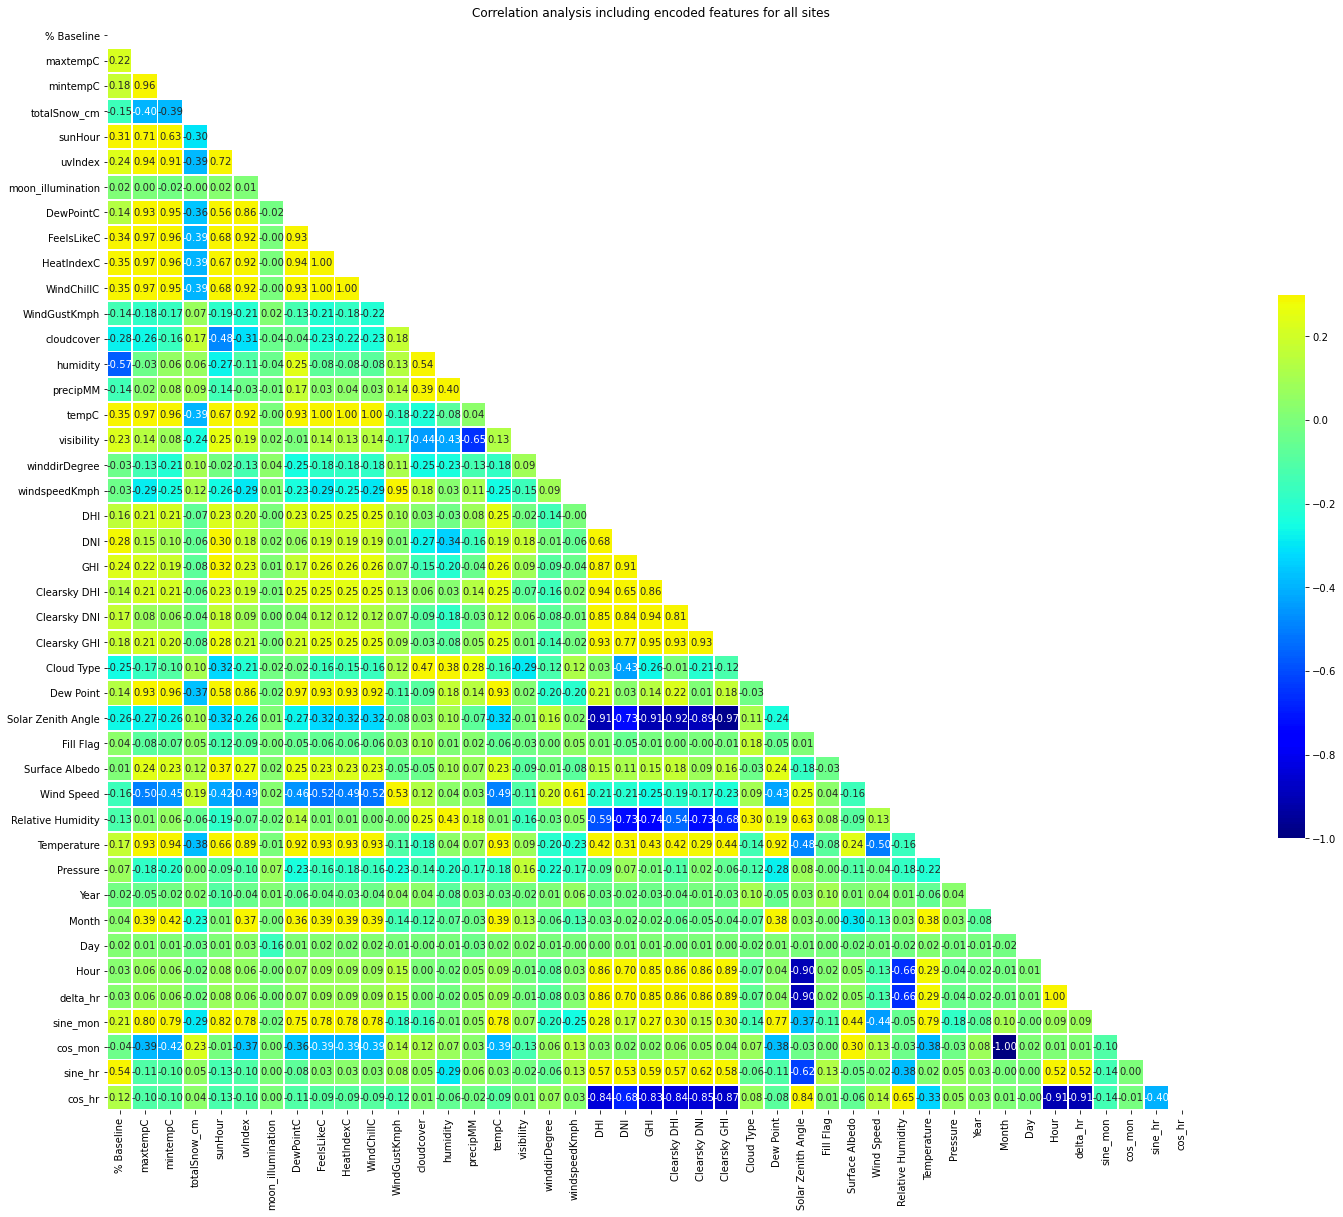

In [46]:
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(merged_df.corr(method='spearman'), mask=mask2, cmap='jet', vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.9, cbar_kws={"shrink": .5});
plt.title('Correlation analysis including encoded features for all sites');

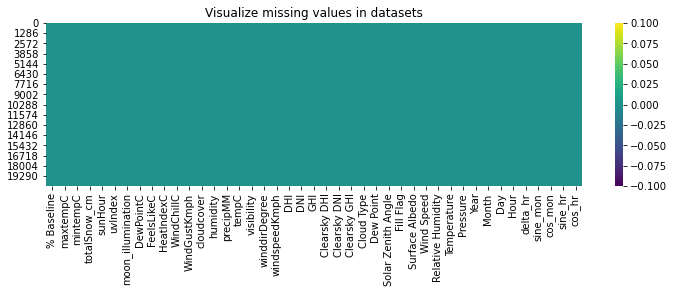

In [47]:
plt.figure(figsize=(12, 3))
sns.heatmap(merged_df.isnull(), cmap='viridis');
plt.title('Visualize missing values in datasets');

In [100]:
merged_df.head(3)

,% Baseline,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,Pressure,Year,Month,Day,Hour,delta_hr,sine_mon,cos_mon,sine_hr,cos_hr
0,0.0079,-3,-6,0.0,8.7,2,1,-14,-13,-5,...,1020,2014,1,1,7,-1,0.0,1.0,-0.281733,0.959493
1,0.1019,-3,-6,0.0,8.7,2,1,-14,-12,-5,...,1020,2014,1,1,8,0,0.0,1.0,0.000000,1.000000
2,0.3932,-3,-6,0.0,8.7,2,1,-14,-11,-4,...,1020,2014,1,1,9,1,0.0,1.0,0.281733,0.959493


## Linear Regression Model with Python and Scikit-Learn

### Declare feature vector and target variable

In [49]:
X = merged_df.drop(['% Baseline'], axis=1)
y= merged_df['% Baseline']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Feature Selection - Dropping features using Pearson Correlation  

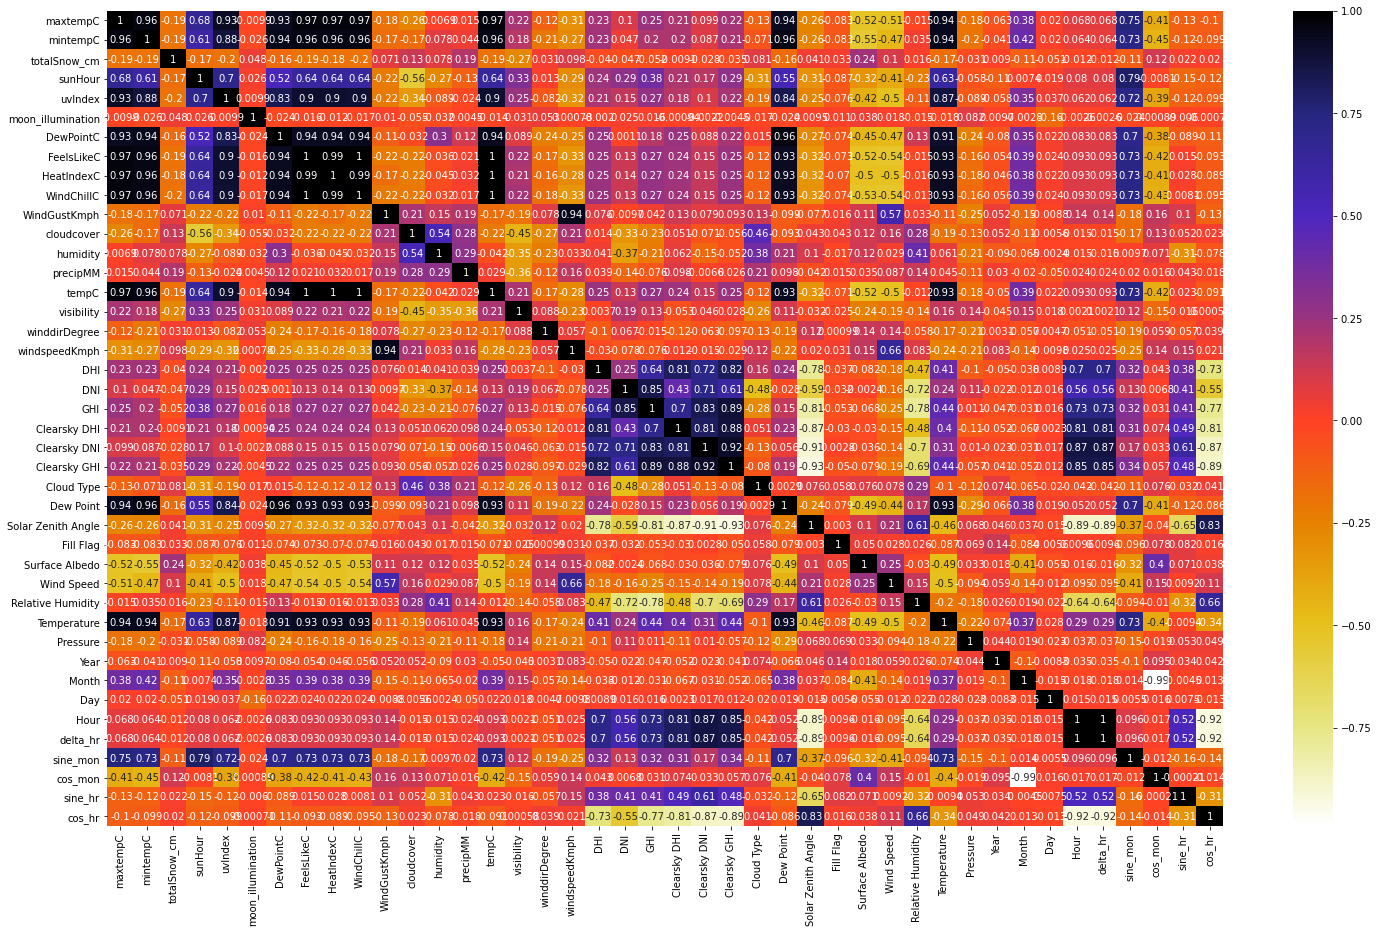

In [51]:
plt.figure(figsize=(25,15))
cor=X_train.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [52]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [53]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

12

In [54]:
corr_features

{'Clearsky GHI',
 'Dew Point',
 'DewPointC',
 'FeelsLikeC',
 'HeatIndexC',
 'Temperature',
 'WindChillC',
 'delta_hr',
 'mintempC',
 'tempC',
 'uvIndex',
 'windspeedKmph'}

In [55]:
X_train.drop(corr_features, axis=1)
X_test.drop(corr_features, axis=1)

,maxtempC,totalSnow_cm,sunHour,moon_illumination,WindGustKmph,cloudcover,humidity,precipMM,visibility,winddirDegree,...,Relative Humidity,Pressure,Year,Month,Day,Hour,sine_mon,cos_mon,sine_hr,cos_hr
6439,14,0.0,12.2,64,27,67,65,0.0,9,219,...,94.20,1000,2015,4,28,10,0.755750,0.654861,0.540641,0.841254
4315,16,0.0,5.5,16,24,74,85,0.1,10,130,...,96.85,1010,2014,10,21,11,0.540641,-0.841254,0.755750,0.654861
11008,2,1.2,10.2,79,21,88,65,0.0,10,77,...,56.77,1010,2016,3,20,15,0.540641,0.841254,0.909632,-0.415415
292,-3,0.0,8.7,43,8,8,66,0.0,10,319,...,88.69,1010,2014,2,6,12,0.281733,0.959493,0.909632,0.415415
15542,-1,0.0,8.7,53,32,6,56,0.0,10,297,...,76.60,1010,2017,2,4,6,0.281733,0.959493,-0.540641,0.841254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11332,13,0.0,13.1,28,66,46,58,0.0,10,202,...,74.71,1010,2016,4,11,15,0.755750,0.654861,0.909632,-0.415415
3727,21,0.0,12.9,93,20,53,61,0.0,10,73,...,53.20,1020,2014,9,8,15,0.755750,-0.654861,0.909632,-0.415415
7933,29,0.0,14.5,94,47,46,75,0.2,10,215,...,65.93,1000,2015,7,30,16,0.989821,-0.142315,0.755750,-0.654861
8559,32,0.0,12.9,35,20,6,63,0.0,10,242,...,94.92,1010,2015,9,8,8,0.755750,-0.654861,0.000000,1.000000


In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
model = LinearRegression()

In [58]:
model.fit(X_train,y_train)

LinearRegression()

In [59]:
print('Coefficients: \n', model.coef_)

Coefficients: 
 [-9.13186407e-03 -4.00880972e-03 -1.46284160e-03  6.76514992e-03
 -1.05256808e-03  1.16050002e-04 -1.45268981e-02 -5.38344663e-04
  2.00866775e-03  8.20647194e-03 -5.26212518e-03 -8.86123447e-04
  3.72545342e-05 -6.92018225e-03  2.73902332e-02 -1.67681379e-03
 -6.80535303e-05  7.88269187e-03  2.80033134e-04  1.63534734e-04
 -1.38859155e-04  2.02690414e-04 -2.99121624e-05  1.70147275e-04
 -4.57787482e-03  6.50281212e-04  5.19715691e-03  2.01548553e-04
 -5.01855001e-02  5.52471496e-03 -5.17565664e-04 -4.02575528e-03
 -1.12404661e-05 -1.11045733e-02  6.55706047e-02  5.41817455e-05
  5.49591314e-03  5.49591314e-03  1.71933522e-01  3.77419188e-01
  3.13264853e-01  8.72476901e-02]


In [60]:
predictions = model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

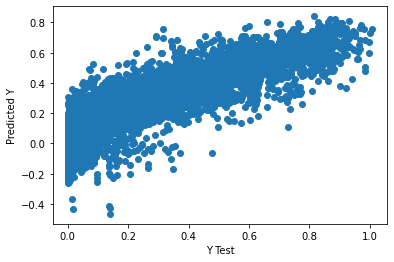

In [61]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [62]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.10157937542894292
MSE: 0.017154754051235056
RMSE: 0.13097615833133547


In [63]:
coeffecients = pd.DataFrame(model.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
maxtempC,-0.009132
mintempC,-0.004009
totalSnow_cm,-0.001463
sunHour,0.006765
uvIndex,-0.001053
moon_illumination,0.000116
DewPointC,-0.014527
FeelsLikeC,-0.000538
HeatIndexC,0.002009
WindChillC,0.008206


In [64]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.7370247571801753


In [65]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [-9.23832727e-03 -4.88030853e-03 -1.28532972e-03  6.60889636e-03
 -1.75174478e-03  1.06958072e-04 -1.44986764e-02 -6.40408770e-04
  2.98840074e-03  8.25575144e-03 -5.04554226e-03 -8.85597079e-04
 -3.70521832e-05 -7.31937034e-03  2.66869794e-02 -1.78237024e-03
 -7.64602236e-05  7.47714504e-03  2.87089906e-04  1.64923696e-04
 -1.36463620e-04  2.42016396e-04 -1.50784505e-05  1.58309224e-04
 -4.35297168e-03 -1.56275498e-03  4.91936273e-03  1.77050059e-04
 -4.82690066e-02  6.06320315e-03  6.67848580e-05 -1.48529707e-03
 -5.81028666e-05 -1.09185699e-02  6.43404701e-02  6.88562442e-05
  5.19203138e-03  5.19203138e-03  1.67431947e-01  3.69482595e-01
  3.01788983e-01  9.72689088e-02]
y-axis intercept:  20.944945435251704


In [66]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 0.0079
Predicted output: 0.13509474367334917
Prediction Error: 0.12719474367334918


In [67]:
pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,0.135095,0.0079,0.127195
1,0.182836,0.1019,0.080936
2,0.269959,0.3932,-0.123241
3,0.296591,0.5447,-0.248109
4,0.333412,0.5485,-0.215088
...,...,...,...
20566,0.303454,0.2325,0.070954
20567,0.290730,0.2214,0.069330
20568,0.282216,0.3111,-0.028884
20569,0.169035,0.0810,0.088035


In [68]:
preds=model.predict(X_test)
preds

array([0.45704202, 0.21003251, 0.29502511, ..., 0.34713365, 0.34320075,
       0.2660226 ])